# Cut Face Sandstone bedding measurement compilation

This notebook compiles field data from summer fieldwork 2020 that give bedding measurements that can be used for the tilt correction of the Cut Face sandstone.

- The goal is to compile all tilt measurements from notebooks and Clino fieldmove data and come up with a mean tilt orientation for pmag analyses. 

## Import scientific Python packages

PmagPy can be installed using pip:
```
pip install pmagpy
```
mplstereonet can be installed using pip:
```
pip install mplstereonet
```

In [2]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mplstereonet

## Cutface Creek sandstone

In [3]:
planes = pd.read_csv('../data/cf structural measurements/combinedplanes.csv')
planes = planes[[' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth', ' strike', ' unitId']]
planes.head(10)

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
0,48.054902,-90.518397,Igneous Foliation,17.503448,201.868240,111.868240,Poplar Lake Intrusion
1,48.054965,-90.518427,Igneous Foliation,15.905780,199.729508,109.729507,Poplar Lake Intrusion
2,48.054981,-90.518477,Igneous Foliation,9.542009,207.324341,117.324341,Poplar Lake Intrusion
3,48.055039,-90.518280,Igneous Foliation,14.075377,211.441071,121.441071,Poplar Lake Intrusion
4,48.055045,-90.518259,Igneous Foliation,17.607458,201.341568,111.341568,Poplar Lake Intrusion
5,48.054973,-90.518490,Igneous Foliation,24.022133,235.558762,145.558762,Poplar Lake Intrusion
6,48.054889,-90.518316,Igneous Foliation,17.817057,187.128128,97.128128,Poplar Lake Intrusion
7,48.054921,-90.518233,Igneous Foliation,15.986528,201.656677,111.656677,Poplar Lake Intrusion
8,48.054888,-90.518257,Igneous Foliation,17.125649,182.341888,92.341888,Poplar Lake Intrusion
9,48.054800,-90.518306,Igneous Foliation,16.229546,206.431290,116.431290,Poplar Lake Intrusion


In [4]:
planes.columns

Index([' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth',
       ' strike', ' unitId'],
      dtype='object')

In [5]:
# filter for the bedding measurements

CF_planes = planes[(planes[' unitId'] == ' Cutface Creek sandstone') & (planes[' planeType'] == ' Bedding')]

CF_planes['pole_trend'] = (CF_planes[' dipAzimuth']+180)%360
CF_planes['pole_plunge'] = 90-CF_planes[' dip']
CF_planes.head()

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId,pole_trend,pole_plunge
221,47.727571,-90.442533,Bedding,9.823921,146.686859,56.686859,Cutface Creek sandstone,326.686859,80.176079
222,47.727587,-90.442595,Bedding,11.817480,146.506927,56.506927,Cutface Creek sandstone,326.506927,78.182520
223,47.727582,-90.442594,Bedding,6.734155,177.580643,87.580643,Cutface Creek sandstone,357.580643,83.265845
224,47.727232,-90.442743,Bedding,10.030728,190.220154,100.220154,Cutface Creek sandstone,10.220154,79.969272
225,47.727479,-90.442674,Bedding,8.423083,169.595963,79.595963,Cutface Creek sandstone,349.595963,81.576917


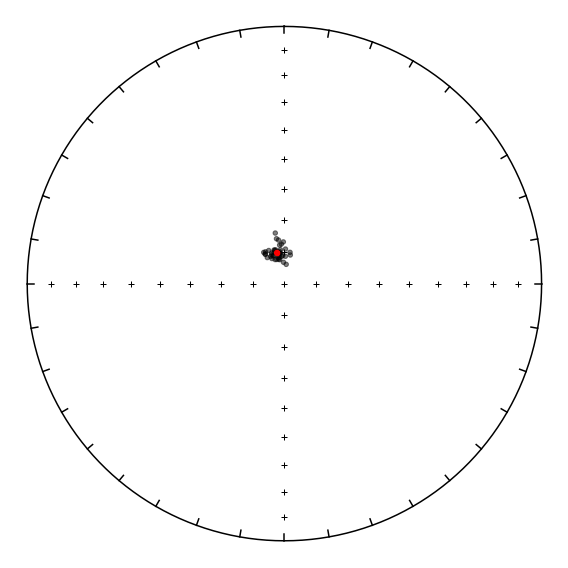

In [6]:
bedding_pole_trend = CF_planes['pole_trend'].tolist()
bedding_pole_plunge = CF_planes['pole_plunge'].tolist()

fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)
ipmag.plot_di(bedding_pole_trend,bedding_pole_plunge,alpha=0.5)

bedding_poles_mean = ipmag.fisher_mean(bedding_pole_trend,bedding_pole_plunge)
ipmag.plot_di_mean(bedding_poles_mean['dec'],bedding_poles_mean['inc'],
                   bedding_poles_mean['alpha95'],color='red')

In [7]:
bedding_mean_dip_direction = bedding_poles_mean['dec']-180
bedding_mean_dip = 90-bedding_poles_mean['inc']
print(bedding_mean_dip_direction,bedding_mean_dip)
bedding_poles_mean

166.50868128119532 9.98430487295937


{'dec': 346.5086812811953,
 'inc': 80.01569512704063,
 'n': 44,
 'r': 43.94895534744579,
 'k': 842.399700033865,
 'alpha95': 0.7417658298716042,
 'csd': 2.79078202513526}

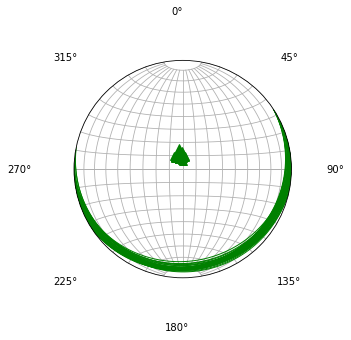

In [8]:
# plot the poles and planes for the bedding measurements
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = CF_planes[' dipAzimuth']-90, CF_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
# ax.rake(strike, dip, -25)
ax.grid()

plt.show()

**The average bedding measurement for the Cutface Creek Sandstone is dip direction of 166.5 and dip of 10.0.**